In [38]:
################
#data.xlsxの患者番号14の右は前処理の便宜上、自分で入力したもの。
#本当は右か左か未記入の欠損値であることに注意
################

###############
#とりあえず一番シンプルに行こう。s.apply(lambda x: pd.Series([x, x * 2], index=['col1', 'col2']))
#欠損データのない治療時期Aのみでモデルを作ってみる。
###############

import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

data = pd.read_csv('../dataset/data.xlsx' , delim_whitespace=True, skiprows=[1,25,42,82] )
del data['左右'] # 左右が記入指定ある列の削除（左右に依存しないはず）
del data['患者番号'] # 欠損データがあるため削除→インデックスを代わりに使用
del data['視']# よくわからんが手で消せないから
data.reset_index(drop=True)

#data[[3:6],[3:6]

,注射時期,年/月/日,治療前視力,治療前Log,治療後視力,治療後Log,注射時期.1,年/月/日.1,治療前視力.1,治療前Log.1,...,年/月/日.2,治療前視力.2,治療前Log.2,治療後視力.2,治療後Log.2,注射時期.3,治療前視力.3,治療前Log.3,治療後視力.3,治療後Log.3
0,A,160819,0.60,0.221849,1.00,0.000000,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,150724,0.40,0.397940,0.60,0.221849,B,151120.0,0.50,0.301030,...,170317.0,0.50,0.301030,0.8,0.096910,NaN,NaN,NaN,NaN,NaN
2,A,151218,0.20,0.698970,0.90,0.045757,B,160527.0,0.70,0.154902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,150904,0.40,0.397940,0.60,0.221849,B,160318.0,0.60,0.221849,...,160926.0,0.50,0.301030,0.6,0.221849,NaN,NaN,NaN,NaN,NaN
4,A,160517,0.50,0.301030,0.60,0.221849,B,170509.0,0.50,0.301030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,170801,0.60,0.221849,1.00,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A,151127,0.70,0.154902,1.00,0.000000,B,160711.0,1.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,160701,0.80,0.096910,1.00,0.000000,B,170203.0,1.00,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,170509,0.80,0.096910,1.00,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,170403,0.50,0.301030,0.80,0.096910,B,170821.0,0.60,0.221849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# 欠損データがあるので治療時期B,C,Dについては削除
drop_col= ["治療後Log.3","治療後Log.3","治療前Log.3", "治療前視力.3" , "注射時期.3","治療後視力.2","治療後Log.2","治療後Log.2","治療前Log.2", "治療前視力.2" , "注射時期.2","治療後視力.1","治療後Log.1",
           "治療後Log.1","治療前Log.1", "治療前視力.1" , "注射時期.1","治療後視力.1","注射時期.2","治療後視力.3","年/月/日.2","年/月/日.1", "注射時期","年/月/日","治療後視力","治療前視力"]
data = data.drop(drop_col , axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
data['x**2'] = data['治療前Log']**2

In [42]:
data['x**3'] = data['治療前Log']**3

In [43]:
x_data= data.loc[:,['治療前Log','x**2',"x**3"]]
y_data = data.loc[:,["治療後Log"]]

In [44]:
#データフレームからnumpyに変換
#x_train = x_train.as_matrix()
#x_test = x_test.as_matrix()
#y_train = y_train.as_matrix()
#y_test = y_test.as_matrix()
x_data = x_data.as_matrix()
y_data = y_data.as_matrix()

In [45]:
# 主成分分析する
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_data_pca = pca.fit_transform(x_data)
x_data_all = np.concatenate([x_data, x_data_pca], axis=1)

In [46]:
# データの正規化
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
#x_data_norm= ms.fit_transform(x_data)
x_data_norm= ms.fit_transform(x_data_all)

## 線形回帰　##

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data_norm, y_data, test_size = 0.1, random_state = 1)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

lin_1dm = LinearRegression()
lin_2dm = LinearRegression()
lin_3dm = LinearRegression()
lin_4dm = LinearRegression()

degree_2 = PolynomialFeatures(degree = 2)
degree_3 = PolynomialFeatures(degree = 3)
degree_4 = PolynomialFeatures(degree = 4)

x_train_2 = degree_2.fit_transform(x_train)
x_train_3 = degree_3.fit_transform(x_train)
x_train_4 = degree_4.fit_transform(x_train)

lin_1dm.fit(x_train, y_train)
lin_2dm.fit(x_train_2, y_train)
lin_3dm.fit(x_train_3, y_train)
lin_4dm.fit(x_train_4, y_train)

x_test_2 = degree_2.fit_transform(x_test)
x_test_3 = degree_3.fit_transform(x_test)
x_test_4 = degree_4.fit_transform(x_test)

score_1dm = lin_1dm.score(x_test, y_test)
score_2dm = lin_2dm.score(x_test_2, y_test)
score_3dm = lin_3dm.score(x_test_3, y_test)
score_4dm = lin_4dm.score(x_test_4, y_test)

# 決定係数は小数点以下３桁にしてみました。
print("一次式における決定係数は、「%.3f"%(score_1dm), "」")
print("二次式における決定係数は、「%.3f"%(score_2dm), "」")
print("三次式における決定係数は、「%.3f"%(score_3dm), "」")
print("四次式における決定係数は、「%.3f"%(score_4dm), "」")


一次式における決定係数は、「0.566 」
二次式における決定係数は、「0.654 」
三次式における決定係数は、「-205.837 」
四次式における決定係数は、「-120961.733 」


In [48]:
print(x_train.shape)

(74, 5)


## ロジスティック回帰 

In [49]:
# keras の準備（ロジスティック回帰）
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD,Adam
from keras import optimizers



# create the logistic regression model
model = Sequential()
model.add(Dense(1, input_shape=(5, )))
model.add(Activation('sigmoid'))
adam = optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# fit the model
hist = model.fit(x_train, y_train, nb_epoch=1000, batch_size=5, verbose=1, validation_split=0.2)

/Users/shun/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 59 samples, validate on 15 samples
Epoch 1/500
59/59 [==============================] - 0s 3ms/step - loss: 0.6152 - acc: 0.3390 - val_loss: 0.5721 - val_acc: 0.4000
Epoch 2/500
59/59 [==============================] - 0s 76us/step - loss: 0.6144 - acc: 0.3390 - val_loss: 0.5710 - val_acc: 0.4000
Epoch 3/500
59/59 [==============================] - 0s 65us/step - loss: 0.6137 - acc: 0.3390 - val_loss: 0.5699 - val_acc: 0.4000
Epoch 4/500
59/59 [==============================] - 0s 94us/step - loss: 0.6130 - acc: 0.3390 - val_loss: 0.5689 - val_acc: 0.4000
Epoch 5/500
59/59 [==============================] - 0s 137us/step - loss: 0.6123 - acc: 0.3390 - val_loss: 0.5679 - val_acc: 0.4000
Epoch 6/500
59/59 [==============================] - 0s 85us/step - loss: 0.6115 - acc: 0.3390 - val_loss: 0.5668 - val_acc: 0.4000
Epoch 7/500
59/59 [==============================] - 0s 90us/step - loss: 0.6108 - acc: 0.3390 - val_loss: 0.5657 - val_acc: 0.4000
Epoch 8/500
59/59 [=============

59/59 [==============================] - 0s 116us/step - loss: 0.5768 - acc: 0.3390 - val_loss: 0.5169 - val_acc: 0.4000
Epoch 63/500
59/59 [==============================] - 0s 86us/step - loss: 0.5763 - acc: 0.3390 - val_loss: 0.5160 - val_acc: 0.4000
Epoch 64/500
59/59 [==============================] - 0s 134us/step - loss: 0.5757 - acc: 0.3390 - val_loss: 0.5152 - val_acc: 0.4000
Epoch 65/500
59/59 [==============================] - 0s 97us/step - loss: 0.5751 - acc: 0.3390 - val_loss: 0.5144 - val_acc: 0.4000
Epoch 66/500
59/59 [==============================] - 0s 90us/step - loss: 0.5746 - acc: 0.3390 - val_loss: 0.5136 - val_acc: 0.4000
Epoch 67/500
59/59 [==============================] - 0s 82us/step - loss: 0.5741 - acc: 0.3390 - val_loss: 0.5128 - val_acc: 0.4000
Epoch 68/500
59/59 [==============================] - 0s 121us/step - loss: 0.5735 - acc: 0.3390 - val_loss: 0.5120 - val_acc: 0.4000
Epoch 69/500
59/59 [==============================] - 0s 86us/step - loss: 0.57

59/59 [==============================] - 0s 111us/step - loss: 0.5475 - acc: 0.3390 - val_loss: 0.4764 - val_acc: 0.4000
Epoch 124/500
59/59 [==============================] - 0s 98us/step - loss: 0.5471 - acc: 0.3390 - val_loss: 0.4759 - val_acc: 0.4000
Epoch 125/500
59/59 [==============================] - 0s 89us/step - loss: 0.5467 - acc: 0.3390 - val_loss: 0.4753 - val_acc: 0.4000
Epoch 126/500
59/59 [==============================] - 0s 114us/step - loss: 0.5462 - acc: 0.3390 - val_loss: 0.4747 - val_acc: 0.4000
Epoch 127/500
59/59 [==============================] - 0s 107us/step - loss: 0.5458 - acc: 0.3390 - val_loss: 0.4742 - val_acc: 0.4000
Epoch 128/500
59/59 [==============================] - 0s 109us/step - loss: 0.5454 - acc: 0.3390 - val_loss: 0.4736 - val_acc: 0.4000
Epoch 129/500
59/59 [==============================] - 0s 112us/step - loss: 0.5449 - acc: 0.3390 - val_loss: 0.4730 - val_acc: 0.4000
Epoch 130/500
59/59 [==============================] - 0s 140us/step - 

Epoch 183/500
59/59 [==============================] - 0s 82us/step - loss: 0.5238 - acc: 0.3390 - val_loss: 0.4449 - val_acc: 0.4000
Epoch 184/500
59/59 [==============================] - 0s 111us/step - loss: 0.5234 - acc: 0.3390 - val_loss: 0.4445 - val_acc: 0.4000
Epoch 185/500
59/59 [==============================] - 0s 76us/step - loss: 0.5231 - acc: 0.3390 - val_loss: 0.4441 - val_acc: 0.4000
Epoch 186/500
59/59 [==============================] - 0s 107us/step - loss: 0.5228 - acc: 0.3390 - val_loss: 0.4437 - val_acc: 0.4000
Epoch 187/500
59/59 [==============================] - 0s 93us/step - loss: 0.5224 - acc: 0.3390 - val_loss: 0.4432 - val_acc: 0.4000
Epoch 188/500
59/59 [==============================] - 0s 102us/step - loss: 0.5221 - acc: 0.3390 - val_loss: 0.4427 - val_acc: 0.4000
Epoch 189/500
59/59 [==============================] - 0s 117us/step - loss: 0.5217 - acc: 0.3390 - val_loss: 0.4422 - val_acc: 0.4000
Epoch 190/500
59/59 [==============================] - 0s 

59/59 [==============================] - 0s 95us/step - loss: 0.5044 - acc: 0.3390 - val_loss: 0.4209 - val_acc: 0.4000
Epoch 244/500
59/59 [==============================] - 0s 110us/step - loss: 0.5041 - acc: 0.3390 - val_loss: 0.4205 - val_acc: 0.4000
Epoch 245/500
59/59 [==============================] - 0s 100us/step - loss: 0.5038 - acc: 0.3390 - val_loss: 0.4202 - val_acc: 0.4000
Epoch 246/500
59/59 [==============================] - 0s 97us/step - loss: 0.5035 - acc: 0.3390 - val_loss: 0.4199 - val_acc: 0.4000
Epoch 247/500
59/59 [==============================] - 0s 87us/step - loss: 0.5032 - acc: 0.3390 - val_loss: 0.4196 - val_acc: 0.4000
Epoch 248/500
59/59 [==============================] - 0s 111us/step - loss: 0.5029 - acc: 0.3390 - val_loss: 0.4193 - val_acc: 0.4000
Epoch 249/500
59/59 [==============================] - 0s 82us/step - loss: 0.5026 - acc: 0.3390 - val_loss: 0.4191 - val_acc: 0.4000
Epoch 250/500
59/59 [==============================] - 0s 82us/step - los

Epoch 304/500
59/59 [==============================] - 0s 82us/step - loss: 0.4877 - acc: 0.3390 - val_loss: 0.4034 - val_acc: 0.4000
Epoch 305/500
59/59 [==============================] - 0s 150us/step - loss: 0.4874 - acc: 0.3390 - val_loss: 0.4031 - val_acc: 0.4000
Epoch 306/500
59/59 [==============================] - 0s 102us/step - loss: 0.4872 - acc: 0.3390 - val_loss: 0.4028 - val_acc: 0.4000
Epoch 307/500
59/59 [==============================] - 0s 146us/step - loss: 0.4869 - acc: 0.3390 - val_loss: 0.4025 - val_acc: 0.4000
Epoch 308/500
59/59 [==============================] - 0s 92us/step - loss: 0.4867 - acc: 0.3390 - val_loss: 0.4022 - val_acc: 0.4000
Epoch 309/500
59/59 [==============================] - 0s 113us/step - loss: 0.4864 - acc: 0.3390 - val_loss: 0.4019 - val_acc: 0.4000
Epoch 310/500
59/59 [==============================] - 0s 100us/step - loss: 0.4861 - acc: 0.3390 - val_loss: 0.4015 - val_acc: 0.4000
Epoch 311/500
59/59 [==============================] - 0s

Epoch 364/500
59/59 [==============================] - 0s 90us/step - loss: 0.4735 - acc: 0.3390 - val_loss: 0.3885 - val_acc: 0.4000
Epoch 365/500
59/59 [==============================] - 0s 127us/step - loss: 0.4732 - acc: 0.3390 - val_loss: 0.3883 - val_acc: 0.4000
Epoch 366/500
59/59 [==============================] - 0s 99us/step - loss: 0.4730 - acc: 0.3390 - val_loss: 0.3881 - val_acc: 0.4000
Epoch 367/500
59/59 [==============================] - 0s 123us/step - loss: 0.4728 - acc: 0.3390 - val_loss: 0.3880 - val_acc: 0.4000
Epoch 368/500
59/59 [==============================] - 0s 78us/step - loss: 0.4726 - acc: 0.3390 - val_loss: 0.3878 - val_acc: 0.4000
Epoch 369/500
59/59 [==============================] - 0s 101us/step - loss: 0.4724 - acc: 0.3390 - val_loss: 0.3875 - val_acc: 0.4000
Epoch 370/500
59/59 [==============================] - 0s 79us/step - loss: 0.4722 - acc: 0.3390 - val_loss: 0.3873 - val_acc: 0.4000
Epoch 371/500
59/59 [==============================] - 0s 9

59/59 [==============================] - 0s 91us/step - loss: 0.4609 - acc: 0.3390 - val_loss: 0.3747 - val_acc: 0.4000
Epoch 425/500
59/59 [==============================] - 0s 97us/step - loss: 0.4607 - acc: 0.3390 - val_loss: 0.3745 - val_acc: 0.4000
Epoch 426/500
59/59 [==============================] - 0s 81us/step - loss: 0.4605 - acc: 0.3390 - val_loss: 0.3744 - val_acc: 0.4000
Epoch 427/500
59/59 [==============================] - 0s 96us/step - loss: 0.4603 - acc: 0.3390 - val_loss: 0.3742 - val_acc: 0.4000
Epoch 428/500
59/59 [==============================] - 0s 86us/step - loss: 0.4601 - acc: 0.3390 - val_loss: 0.3741 - val_acc: 0.4000
Epoch 429/500
59/59 [==============================] - 0s 109us/step - loss: 0.4599 - acc: 0.3390 - val_loss: 0.3740 - val_acc: 0.4000
Epoch 430/500
59/59 [==============================] - ETA: 0s - loss: 0.4649 - acc: 0.340 - 0s 84us/step - loss: 0.4597 - acc: 0.3390 - val_loss: 0.3738 - val_acc: 0.4000
Epoch 431/500
59/59 [================

59/59 [==============================] - 0s 100us/step - loss: 0.4497 - acc: 0.3390 - val_loss: 0.3632 - val_acc: 0.4000
Epoch 484/500
59/59 [==============================] - 0s 94us/step - loss: 0.4496 - acc: 0.3390 - val_loss: 0.3630 - val_acc: 0.4000
Epoch 485/500
59/59 [==============================] - 0s 95us/step - loss: 0.4494 - acc: 0.3390 - val_loss: 0.3628 - val_acc: 0.4000
Epoch 486/500
59/59 [==============================] - 0s 131us/step - loss: 0.4492 - acc: 0.3390 - val_loss: 0.3627 - val_acc: 0.4000
Epoch 487/500
59/59 [==============================] - 0s 94us/step - loss: 0.4490 - acc: 0.3390 - val_loss: 0.3625 - val_acc: 0.4000
Epoch 488/500
59/59 [==============================] - 0s 107us/step - loss: 0.4489 - acc: 0.3390 - val_loss: 0.3623 - val_acc: 0.4000
Epoch 489/500
59/59 [==============================] - 0s 140us/step - loss: 0.4487 - acc: 0.3390 - val_loss: 0.3622 - val_acc: 0.4000
Epoch 490/500
59/59 [==============================] - 0s 92us/step - lo

test loss: 0.5889853239059448
test acc: 0.4444444477558136


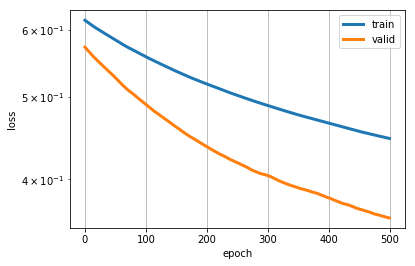

In [51]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

from matplotlib import pyplot

pyplot.plot(hist.history['loss'], linewidth=3, label='train')
pyplot.plot(hist.history['val_loss'], linewidth=3, label='valid')
pyplot.grid()
pyplot.legend()
pyplot.xlabel('epoch')
pyplot.ylabel('loss')
#pyplot.ylim(1e-3, 1e-2)
pyplot.yscale('log')
pyplot.show()
